<a href="https://colab.research.google.com/github/alaa-alt/ITI/blob/main/Recommendation_Systems/recommender_systems_lab4_Alaa_Abdelmonsef_Elkaffas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Recommender \space Systems $$
$$ Lab \space no. \space 4 $$

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Check if GPU is available and set device accordingly


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda:0


## 1. Tensors - The Fundamental Data Structure in PyTorch

# Creating tensors


In [ ]:
# From Python lists
x = torch.tensor([1, 2, 3, 4])
print(f"Tensor from list: {x}")
# From NumPy arrays
np_array = np.array([1, 2, 3, 4])
x_from_numpy = torch.from_numpy(np_array)
print(f"Tensor from NumPy: {x_from_numpy}")
# Tensor with specific data type (float32, float64)
x_float = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
print(f"Float32  tensor: {x_float}")
x_float2 = torch.tensor([1, 2, 3, 4], dtype=torch.float64)
print(f"Float64 tensor: {x_float2}")
# Creating tensors with specific shapes
zeros = torch.zeros(3, 4)
ones = torch.ones(2, 3)
rand_tensor = torch.rand(3, 3)
print("\nTensors with specific shapes:")
print(f"Zeros tensor (3x4):\n{zeros}")
print(f"Ones tensor (2x3):\n{ones}")
print(f"Random tensor (3x3):\n{rand_tensor}")

Tensor from list: tensor([1, 2, 3, 4])
Tensor from NumPy: tensor([1, 2, 3, 4])
Float32  tensor: tensor([1., 2., 3., 4.])
Float64 tensor: tensor([1., 2., 3., 4.], dtype=torch.float64)

Tensors with specific shapes:
Zeros tensor (3x4):
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
Ones tensor (2x3):
tensor([[1., 1., 1.],
        [1., 1., 1.]])
Random tensor (3x3):
tensor([[0.3616, 0.9961, 0.0408],
        [0.2909, 0.2790, 0.0837],
        [0.6187, 0.6450, 0.7803]])


# Tensor operations


In [ ]:
# Adding, multiplication
a = torch.tensor([1, 2, 3], dtype=torch.float32)
b = torch.tensor([4, 5, 6], dtype=torch.float32)
print("\nTensor operations:")
print(f"a + b = {a + b}")
print(f"a * b = {a * b}")
# Reshaping tensors
c = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(f"\nOriginal tensor:\n{c}")
print(f"Reshaped tensor:\n{c.reshape(3, 2)}")
print(f"Transposed tensor:\n{c.t()}")
# Moving tensors to GPU if available
if torch.cuda.is_available():
    x_gpu = x.to(device)
    print(f"\nTensor moved to GPU: {x_gpu.device}")


Tensor operations:
a + b = tensor([5., 7., 9.])
a * b = tensor([ 4., 10., 18.])

Original tensor:
tensor([[1, 2, 3],
        [4, 5, 6]])
Reshaped tensor:
tensor([[1, 2],
        [3, 4],
        [5, 6]])
Transposed tensor:
tensor([[1, 4],
        [2, 5],
        [3, 6]])

Tensor moved to GPU: cuda:0


## 2. Autograd - Automatic Differentiation

In [ ]:
# Creating tensors with gradient tracking
x = torch.tensor([2.0], requires_grad=True)
y = x ** 2 + 3*x + 1
print("\nAutograd example:")
print(f"y = x^2 + 3x + 1 = {y} when x = {x}")
# Computing gradients
y.backward()
print(f"dy/dx = 2x + 3 = {x.grad} when x = {x}")
# Example of gradient accumulation and zeroing
x = torch.tensor([2.0], requires_grad=True)
y = x ** 2
y.backward()
print(f"First gradient: {x.grad}")
# Gradient will accumulate if we don't zero it
y = x ** 3
y.backward()
print(f"Accumulated gradient (should be wrong): {x.grad}")
# Zero the gradient and compute again
x.grad.zero_()
y = x ** 3
y.backward()
print(f"Correct gradient after zeroing: {x.grad}")


Autograd example:
y = x^2 + 3x + 1 = tensor([11.], grad_fn=<AddBackward0>) when x = tensor([2.], requires_grad=True)
dy/dx = 2x + 3 = tensor([7.]) when x = tensor([2.], requires_grad=True)
First gradient: tensor([4.])
Accumulated gradient (should be wrong): tensor([16.])
Correct gradient after zeroing: tensor([12.])


## 3. Neural Networks with nn.Module


In [ ]:
# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
# Create a model instance
model = SimpleNN(input_size=10, hidden_size=20, output_size=2)
print("\nSimple Neural Network:")
print(model)
# Random input
x = torch.randn(5, 10)  # 5 samples, 10 features each
print(f"\nInput shape: {x.shape}")
# Forward pass
output = model(x)
print(f"Output shape: {output.shape}")
# Access model parameters, print them
print("\nModel parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.shape}")


Simple Neural Network:
SimpleNN(
  (fc1): Linear(in_features=10, out_features=20, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=20, out_features=2, bias=True)
)

Input shape: torch.Size([5, 10])
Output shape: torch.Size([5, 2])

Model parameters:
fc1.weight: torch.Size([20, 10])
fc1.bias: torch.Size([20])
fc2.weight: torch.Size([2, 20])
fc2.bias: torch.Size([2])


## 4. Loss Functions and Optimizers


In [ ]:
# Create some dummy data
inputs = torch.randn(100, 10)
targets = torch.randint(0, 2, (100,))
# Create a model
model = SimpleNN(input_size=10, hidden_size=20, output_size=2)
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
print("\nTraining example:")
# Train for 5 epochs
for epoch in range(5):
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Training example:
Epoch 1, Loss: 0.7329
Epoch 2, Loss: 0.7323
Epoch 3, Loss: 0.7318
Epoch 4, Loss: 0.7312
Epoch 5, Loss: 0.7307


## 5. Datasets and DataLoaders


100%|██████████| 9.91M/9.91M [00:00<00:00, 14.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 485kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.82MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.75MB/s]


Dataset and DataLoader:
Number of training samples: 60000
Number of test samples: 10000
Number of batches in trainloader: 938


Batch shape: torch.Size([64, 1, 28, 28])
Labels: tensor([7, 7, 1, 6, 0, 6, 5, 4])

Sample images from MNIST dataset:


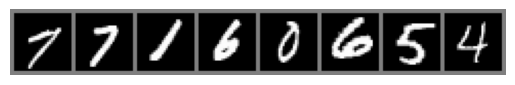

In [ ]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])
# Load MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)
# Create DataLoaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)
print("\nDataset and DataLoader:")
print(f"Number of training samples: {len(trainset)}")
print(f"Number of test samples: {len(testset)}")
print(f"Number of batches in trainloader: {len(trainloader)}")
# Visualize a batch of data
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(f"Batch shape: {images.shape}")
print(f"Labels: {labels[:8]}")
# Function to display images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()
# Display a batch of images
print("\nSample images from MNIST dataset:")
# Uncomment the following line to display images when running in a notebook
imshow(torchvision.utils.make_grid(images[:8]))

## 6. Convolutional Neural Networks (CNNs)


In [ ]:
# Define a CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
# Create a CNN model
cnn_model = SimpleCNN()
print("\nConvolutional Neural Network:")
print(cnn_model)


Convolutional Neural Network:
SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


## 7. Training a CNN on MNIST


In [ ]:
# Move model to device (GPU if available)
cnn_model = cnn_model.to(device)
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)
# Train function
def train_model(model, loader, criterion, optimizer, num_epochs=2):
    print("\nTraining CNN on MNIST:")
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for i, (images, labels) in enumerate(loader):
            images, labels = images.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            loss.backward()
            optimizer.step()

            # Track statistics
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Print statistics every 100 mini-batches
            if i % 100 == 99:
                print(f"Epoch {epoch+1}, Batch {i+1}, Loss: {running_loss/100:.3f}, "
                      f"Accuracy: {100 * correct / total:.2f}%")
                running_loss = 0.0

        print(f"Epoch {epoch+1} completed")

# Comment out the following line to skip training
train_model(cnn_model, trainloader, criterion, optimizer, num_epochs=2)


Training CNN on MNIST:
Epoch 1, Batch 100, Loss: 0.726, Accuracy: 78.55%
Epoch 1, Batch 200, Loss: 0.195, Accuracy: 86.43%
Epoch 1, Batch 300, Loss: 0.135, Accuracy: 89.46%
Epoch 1, Batch 400, Loss: 0.095, Accuracy: 91.40%
Epoch 1, Batch 500, Loss: 0.090, Accuracy: 92.58%
Epoch 1, Batch 600, Loss: 0.085, Accuracy: 93.41%
Epoch 1, Batch 700, Loss: 0.073, Accuracy: 94.05%
Epoch 1, Batch 800, Loss: 0.072, Accuracy: 94.52%
Epoch 1, Batch 900, Loss: 0.066, Accuracy: 94.91%
Epoch 1 completed
Epoch 2, Batch 100, Loss: 0.054, Accuracy: 98.34%
Epoch 2, Batch 200, Loss: 0.052, Accuracy: 98.35%
Epoch 2, Batch 300, Loss: 0.054, Accuracy: 98.40%
Epoch 2, Batch 400, Loss: 0.047, Accuracy: 98.42%
Epoch 2, Batch 500, Loss: 0.047, Accuracy: 98.45%
Epoch 2, Batch 600, Loss: 0.054, Accuracy: 98.43%
Epoch 2, Batch 700, Loss: 0.037, Accuracy: 98.48%
Epoch 2, Batch 800, Loss: 0.044, Accuracy: 98.50%
Epoch 2, Batch 900, Loss: 0.044, Accuracy: 98.52%
Epoch 2 completed


## 8. Evaluating the Model


In [ ]:
def evaluate_model(model, loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient computation
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"\nTest Accuracy: {100 * correct / total:.2f}%")

# Comment out the following line to skip evaluation
evaluate_model(cnn_model, testloader)


Test Accuracy: 98.84%


## 9. Saving and Loading Models


In [ ]:
# Save model
model_path = "mnist_cnn.pth"
torch.save(cnn_model.state_dict(), model_path)
print(f"\nModel saved to {model_path}")
# Load model
new_model = SimpleCNN()
new_model.load_state_dict(torch.load(model_path))
new_model.to(device)
print("Model loaded successfully")


Model saved to mnist_cnn.pth
Model loaded successfully


## 10. Transfer Learning


In [ ]:
# Define a new model based on a pre-trained network
class TransferModel(nn.Module):
    def __init__(self, num_classes=10):
        super(TransferModel, self).__init__()
        # Use a pre-trained ResNet18 model
        self.resnet = torchvision.models.resnet18(pretrained=True)

        # Replace the last fully connected layer
        num_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_features, num_classes)

        # Modify the first convolution layer to accept grayscale input
        self.resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

    def forward(self, x):
        return self.resnet(x)
# Create transfer learning model
transfer_model = TransferModel()
print("\nTransfer Learning Model:")
print(f"Using ResNet18 with modified input layer and output layer")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 168MB/s]



Transfer Learning Model:
Using ResNet18 with modified input layer and output layer


## 11. Advanced Techniques: Learning Rate Scheduler


In [ ]:
# Define a learning rate scheduler
optimizer = optim.SGD(transfer_model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

print("\nLearning rate scheduler:")
print(f"Initial learning rate: {optimizer.param_groups[0]['lr']}")
# Simulate training for 15 epochs
for epoch in range(15):
    # Training code would go here

    # Step the scheduler
    scheduler.step()
    if epoch % 3 == 0:
        print(f"Epoch {epoch}: Learning rate = {optimizer.param_groups[0]['lr']}")


Learning rate scheduler:
Initial learning rate: 0.01
Epoch 0: Learning rate = 0.01
Epoch 3: Learning rate = 0.01
Epoch 6: Learning rate = 0.001
Epoch 9: Learning rate = 0.001
Epoch 12: Learning rate = 0.001


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:227: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


## 12. Custom Datasets


In [ ]:
# Define a custom dataset
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        if self.transform:
            sample = self.transform(sample)
        return sample, self.labels[idx]
# Create a simple custom dataset
data = torch.randn(100, 1, 28, 28)  # 100 grayscale images of size 28x28
labels = torch.randint(0, 10, (100,))  # Random labels between 0 and 9

custom_dataset = CustomDataset(data, labels)
custom_loader = torch.utils.data.DataLoader(custom_dataset, batch_size=10, shuffle=True)

print("\nCustom Dataset:")
print(f"Dataset size: {len(custom_dataset)}")
print(f"Batch size: {next(iter(custom_loader))[0].shape}")


Custom Dataset:
Dataset size: 100
Batch size: torch.Size([10, 1, 28, 28])


----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Mahmoud \space Shawqi $$